# Machine Learning / Deep Learning
# Chapter 1. 퍼셉트론 (Perceptron)
컴퓨터과학 전체를 통틀어서 최근 가장 핫한 주제를 꼽으라면 단연 머신러닝(machine learning) 분야라고 말할 수 있을 것 같습니다. 머신러닝은 인공지능(Artificial Intelligence, AI)의 하위 분야로 출현한 주제로, 사람이 수동으로 대량의 데이터를 분석하여 규칙을 유도하는 대신, 컴퓨터가 데이터에서 더 효율적으로 지식을 추출해 예측 모델과 데이터 기반 의사 결정 성능을 향상시킵니다. 음성 인식, 웹 검색 엔진, 체스 대결 프로그램, 자율 주행, 의료 애플리케이션 등의 복잡한 딥러닝도 그 시작을 거슬러 올라가면 비교적 단순한 알고리즘으로부터 시작된 방식입니다. 우리도 데이터 분석과 데이터 엔지니어를 지향하는 사람으로써 그 기법에 숨어있는 논리와 코드 구조를 파악하고 넘어갈 필요가 있습니다.  
이번 챕터에서는 머신러닝 분야의 소개와 큰 틀에서의 분류를 간략하게 짚고 넘어간 뒤, 태초의 머신러닝 알고리즘인 퍼셉트론에 대해 짚고 넘어가겠습니다.  

## 1.1 머신러닝의 세 가지 종류
모든 머신러닝 알고리즘은 그 분석 대상이 되는 데이터의 특성, 또는 알고리즘 자체의 특성에 따라 지도학습(supervised learning), 비지도학습(unsupervised learning), 강화학습(reinforced learning)의 세 가지 분파로 나뉩니다.  

|학습 종류|특성|
|:---:|:---|
|지도학습|레이블된 데이터</br>직접 피드백</br>출력 및 미래 예측|
|비지도학습|레이블 및 타겟 없음</br>피드백 없음</br>데이터에서 숨겨진 구조 찾기|
|강화학습|결정 과정</br>보상 시스템</br>연속된 행동에서 학습|  

### 1.1.1 지도학습 - 미래 예측
지도학습은 레이블(label, 특정 샘플에 할당된 클래스 또는 카테고리)이 할당된 훈련 데이터에서 모델을 학습하여 본 적 없는 미래 데이터의 예측을 만드는 것입니다. 여기서 **지도**는 출력 신호, 즉 레이블이 있는 일련의 샘플(데이터 입력)을 의미합니다. 개별 클래스 레이블이 있는 지도학습을 분류(classification)이라 하며, 클래스 레이블이 없이 연속적인 값을 출력하는 문제를 회귀(regression)라고 합니다.  

#### 분류: 클래스 레이블 예측
스팸 메일을 필터링하는 예를 생각해보죠. 레이블된 이메일 데이터셋에서 지도학습 머신러닝 알고리즘을 사용해 모델을 훈련할 수 있습니다. 이 데이터셋은 스팸 또는 스팸이 아닌 이메일로 정확하게 표시되어 있습니다. 훈련된 모델은 새로운 이메일이 이 두 가지 카테고리 중 어디에 속하는지 예측합니다. 이와 같이 분류 문제는 과거의 관측을 기반으로 새로운 샘플의 범주형 클래스 레이블을 예측합니다.  
클래스 레이블은 이산적(discrete, 셀 수 있음 또는 그 수가 유한함)이고 순서가 없어 샘플이 속한 그룹으로 이해할 수 있습니다. 스팸 메일 감지 문제는 스팸과 스팸이 아닌 이메일 두 개의 클래스 사이를 구분하는 규칙을 학습합니다. 이처럼 레이블이 두 개 뿐인 문제를 이진 분류(binary classification) 문제라고 합니다.  
아래 그림은 30개의 훈련 샘플이 있는 이진 분류 작업의 개념을 나타냅니다. 15개의 샘플은 음성 클래스로 레이블(마이너스 기호)되어 있고, 나머지 15개는 양성 클래스로 레이블(덧셈 기호)되어 있습니다. 각 샘플이 두 개의 $x_1$, $x_2$ 값에 연관되어 있으므로 이 데이터셋은 2차원 데이터셋입니다. 지도학습 알고리즘을 사용해 두 클래스를 구분할 수 있는 규칙을 학습하는데, 이 규칙은 점선으로 나타난 결정 경계(decision boundary)입니다. 새로운 데이터의 $x_1$, $x_2$이 주어지면 두 범주 중 하나로 분류합니다.  
![그림 1-3](https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch01/images/01_03.png?raw=true)  
한편, 두 개 이상의 클래스 레이블을 가진 경우는 다중 분류(multiclass classification) 문제라고 합니다. 전형적인 예시는 손글씨 인식으로, 글자를 순서가 없는 범주나 클래스 레이블로 구성합니다. 예를 들자면, 딥러닝 파트에서 설명할 MNIST 손글씨 데이터는 $28\times 28$ 사이즈의 이미지 데이터에 알파벳('A', 'B', 'C', ...) 레이블이 부여됩니다. 새로운 글자를 입력으로 제공하면 예측 모델이 일정한 정확도로 알파벳 글자를 예측할 것입니다. 뜬금없이 0에서 9까지의 숫자 이미지가 입력으로 주어진다면 이 모델은 숫자를 인식하지 못하고 알파벳 중 한 가지로 인식할 것입니다.

#### 회귀: 연속적인 출력값 예측
회귀는 **예측 변수**(predictor variable, 또는 **설명 변수**, explanatory variable)와 연속적인 **반응 변수**(response variable, 또는 **결과**, result)가 주어졌을 때 출력값을 예측하기 위해 두 변수 사이의 관계를 찾습니다. 흔히 머신러닝 분야에서는 이 중 예측 변수를 **특성**(feature), 반응 변수를 **타겟**(target)이라고 부르는 관례가 있습니다.  
예를 들어 학생들의 수능 점수를 예측한다고 해보죠. 시험 공부에 투자한 시간과 최종 점수 사이에 관계가 있다면 두 값으로 훈련 데이터를 만들고 모델을 학습할 수 있습니다. 이 모델은 수험생들의 공부 시간을 이용하여 시험 점수를 예측합니다.  
> <span style='background-color:blue'>여담</span></br>회귀는 1886년 프랜시스 갈톤(Francis Galton)이 쓴 논문 "Regression toward Mediocrity in Hereditary Stature"에서 유래되었습니다. 갈톤은 사람 키의 분산이 시대가 흘러도 증가하지 않는 생물학적 현상을 설명했습니다. 부모의 키가 자녀에게 전달되지 않기 때문에 오히려 자녀의 키는 인구 전체 평균으로 회귀합니다. 이것이 회귀라는 용어의 유래입니다.  

아래 그림은 선형회귀(linear regression)의 개념을 나타냅니다. 특성 $x$와 타겟 $y$가 주어지면 데이터 포인트와 직선 사이의 거리가 최소가 되는 직선을 그을 수 있습니다. 이렇게 데이터에서 학습한 직선의 기울기와 절편(intercept)을 사용해 새로운 데이터의 출력값을 예측합니다.  
![그림 1-4](https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch01/images/01_04.png?raw=true)  

### 1.1.2 비지도학습 - 숨겨진 구조 발견
비지도학습에서는 레이블되지 않거나 구조를 알 수 없는 데이터를 다룹니다. 알려진 출력값 없이도 의미 있는 정보를 추출하기 위해 데이터 구조를 탐색할 수 있습니다.
#### 군집: 하위 그룹 찾기
군집(clustering)은 사전 정보 없이 쌓여 있는 그룹 정보를 의미있는 하위 그룹(subgroup) 또는 클러스터(cluster)로 조직하는 탐색적 데이터 분석 기법입니다. 분석 과정에서 만든 각 클러스터는 어느 정도 유사성을 공유하고 다른 클러스터와는 비슷하지 않는 샘플 그룹을 형성합니다. 보통 군집 분석 자체를 비지도 분류(unsupervised classification)이라고 칭하기도 합니다.  
![그림 1-6](https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch01/images/01_06.png?raw=true)  
#### 차원 축소: 데이터 압축
비지도학습의 또다른 하위 분야는 차원 축소(dimensionality reduction)입니다. 고차원의 데이터는 하나의 관측 샘플에 수많은 측정 지표 또는 특성이 있습니다. 이로 인해 머신러닝 알고리즘의 계산 성능과 저장 공간의 한계에 맞닥뜨릴 수 있습니다. 비지도 차원 축소는 잡음(noise) 데이터를 제거하기 위해 특성 전처리에서 종종 적용하는 방법입니다. 이런 잡음 데이터는 특정 알고리즘의 예측 성능을 감소시킬 수 있습니다. 차원 축소는 관련 있는 정보를 대부분 유지하면서 더 작은 차원을 가진 부분 공간으로 데이터를 압축합니다. 우리는 머신러닝 5단원에서 이 기법을 사용하는 법을 배울 것입니다.  
차원 축소는 데이터 시각화에도 유용합니다. 고차원 특성을 1차원 또는 2차원, 3차원 특성 공간으로 투영해 시각화하는 것입니다. 아래 그림은 차원 축소를 이용해 3D 스위스롤(Swiss Roll) 모양의 데이터를 새로운 2D 특성의 부분공간으로 압축하는 예를 보여줍니다.  
![그림 1-7](https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch01/images/01_07.png?raw=true)

### 1.1.3 강화학습 - 반응형 문제 해결
강화학습은 환경과 상호작용하여 **에이전트**(agent)라고 하는 시스템 성능을 향상하는 것이 목적입니다. 환경의 현재 상태 정보는 **보상**(reward) 신호를 포함합니다. 이 때문에 강화학습을 지도학습과 관련된 분야로 오해하는 경우도 있지만, 강화학습의 피드백은 정답 레이블이나 값이 아닙니다. 보상 함수로 얼마나 행동이 좋은지를 측정한 값입니다. 에이전트는 환경과 상호작용하여 보상이 최대화되는 일련의 행동을 강화학습으로 학습합니다.  
강화학습의 대표적인 예시는 지난 2016년 이세돌 9단과의 바둑 대결에서 4:1로 승리했던 구글의 알파고(AlphaGo)가 있습니다. 그 당시까지 알파고는 인간 전문가들의 기보 수백만 개를 기반으로 한 학습 데이터를 사용하여 지도학습을 했습니다. 이세돌과의 대결에서 승리한 딥마인드 팀의 다음번 시도인 알파고 제로(AlphaGo Zero)는 이 과정을 완전히 생략하고 강화학습을 이용하여 여러 가지 버전의 신경망 기반 인공지능 에이전트끼리 서로 대결하여 스스로 학습하는 방법을 사용했습니다. 이렇게 획기적인 일을 달성하는 데 **사람들이 수 세기 동안 쌓아온 바둑의 지혜가 필요하지 않았다**는 점도 놀라운 점이었습니다.

## 1.2 머신러닝 시스템 로드맵
머신러닝은 모델의 학습뿐만 아니라 그 이전의 데이터 전처리, 그 이후의 모델 성능 평가, 데이터 시각화를 포함한 분석 및 해석까지 총망라하는 거대한 프레임워크를 다룰 수 있어야 합니다. 따라서 단편적인 알고리즘의 사용 방법 학습만으로는 학습자 개개인의 능력을 향상시키기 어렵다는 점이 중론이며, **이것이 지금까지 넘파이와 판다스, 데이터 시각화 등을 중점적으로 먼저 강의한 이유입니다**. 데이터 분석과 해석을 제외한 머신러닝의 워크플로우는 보통 아래 그림과 같이 간략하게 나타낼 수 있습니다.  
![그림 1-9](images/Fig1_9.png)  
* *전처리(preprocessing)*</br>많은 머신러닝 알고리즘은 최적의 성능을 내기 위해 특성을 같은 스케일로 만들어야 합니다. 특성을 $\left[0, 1\right]$ 범위로 변환하거나 평균이 0이고 표준편차가 1인 표준정규분포로 변환하는 경우가 많습니다.</br>일부 특성은 매우 상관관계가 높아 어느 정도 중복된 정보를 가질 수 있어 차원 축소 기법을 사용해 저차원 부분공간으로 압축해야 할 수도 있습니다. 이러면 저장 공간도 덜 필요하고 학습도 더 빨리 진행됩니다. 심지어 모델의 예측 성능도 올라가기도 합니다.</br>또한 데이터의 예측 성능이 새로운 데이터에서도 잘 일반화되는지 확인하기 위해 훈련 데이터셋과 테스트 데이터셋으로 분할하는 것도 이 단계에서 수행합니다.
* *모델 훈련과 선택*</br>머신러닝 알고리즘은 **각기 다른 문제를 해결하기 위해 개발되었습니다**. 가장 좋은 모델을 훈련하고 선택하기 위해 최소 몇 가지 정도의 알고리즘을 비교해야 합니다. 여러 모델을 비교하기 전에 먼저 성능 측정 지표를 결정해야 합니다. 정확히 분류된 샘플 비율인 **정확도**(accuracy)가 대표적입니다.</br>또한 교차검증 및 하이퍼파라미터 최적화도 이 단계에서 수행합니다.
* *모델 평가 및 예측*</br>훈련 데이터셋에 대한 최적의 모델을 선택한 후에는 테스트 데이터셋을 사용해 이전에 본 적이 없는 데이터에서 얼마나 성능을 내는지 예측하여 일반화 오차를 예상합니다. 이 성능에 만족한다면 이 모델을 사용해 새로운 데이터를 예측할 수 있습니다.

## 1.2 퍼셉트론
분류를 위한 초창기 머신러닝 알고리즘은 퍼셉트론(Perceptron)이라고 명명되었으며, 인간의 신경 세포를 이진 출력 논리 회로로 표현했습니다. 두 클래스를 간단하게 1(양성 클래스)과 -1(음성 클래스)로 나타낸 것이죠. ~~모 아니면 도??~~ 뇌의 뉴런은 출력을 내거나 내지 않는 두 가지 경우만 있다고 가정한 후, 아래 순서대로 알고리즘을 구성했다고 합니다.  
1. 가중치를 0 또는 랜덤한 작은 값으로 초기화합니다.
2. 각 훈련 샘플 $\boldsymbol{x}^{\left(i\right)}$에서 다음 작업을 합니다.
    a. 출력값 $y$를 계산합니다.  
    b. 가중치를 업데이트합니다.  

여기서 출력값은 단위 계단 함수(unit step function)로 예측한 클래스 레이블입니다. 단위 계단 함수는 입력값이 0보다 크면 +1을, 입력값이 0보다 작으면 -1을 반환하는 함수입니다.  
가중치 벡터 $w_j$에 대한 업데이트 값 또는 $w_j$의 변화량인 $\Delta w_j$ 값은 학습 규칙에 따라 계산됩니다.  
$$\Delta w_j = \eta\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)x_j^{\left(i\right)}$$  
위 식의 항들을 설명하자면, $\eta$(에타라고 읽습니다!)는 학습률(learning rate)이라고 하며, 0.0 ~ 1.0 사이의 값을 갖습니다. 학습률의 값은 모델의 학습이 시작되기 전에 사용자가 지정해줍니다. 학습률이 너무 크면 출력의 오차가 작아지지 않고, 그렇다고 너무 작으면 오차가 작아지는 속도가 느려집니다. 이렇듯 적절한 상수의 값을 찾아주는 과정을 튜닝(tuning)이라고 하며, 사용자가 튜닝해주는 상수를 하이퍼파라미터(hyperparameter)라고 합니다. 뒤로 갈수록 소개할 알고리즘에서 튜닝해 줄 하이퍼파라미터의 개수가 많아질 것입니다.  
$y^{\left(i\right)}$는 진짜 클래스 레이블(true class label), $\hat{y}^{\left(i\right)}$는 예측 클래스 레이블입니다. 이 두 기호들은 향후 다른 알고리즘 설명에서도 공통적으로 등장하니 눈에 익혀두세요! 여기서 가중치 벡터의 모든 가중치는 컴퓨터가 동시에 업데이트해줍니다.   
퍼셉트론은 두 클래스가 선형적으로 구분되고(한마디로, 결정 경계가 직선일 때) 학습률이 충분히 작을 때만 수렴이 보장됩니다. 두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수, 즉 **에포크**(epoch)를 지정하거나 허용 오차를 지정해야 합니다. 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않습니다.  
지금까지의 과정을 그림으로 나타내면 아래와 같습니다.  
![그림 2-4](images/Fig2_4.png)  

### 1.2.1 퍼셉트론 클래스
간편하게 사이킷런에 내장된 퍼셉트론 API를 불러오기 전에, `Perceptron`이라는 이름으로 클래스를 정의하면 어떻게 되는지 ~~어떤 참사가 일어나는지~~ 보겠습니다. 이 클래스 내부에는 모델 객체 훈련에 사용되는 `fit()` 메서드, 훈련이 끝난 모델을 이용한 예측에 사용되는 `predict()` 메서드 등이 있습니다. 관례에 따라 객체 초기화 과정에서 생성하지 않고 다른 메서드를 호출해서 만드는 속성들은 언더바(`_`)를 추가합니다. `self.w_` 등이 여기에 해당합니다.

In [1]:
import numpy as np

In [2]:
class Perceptron():
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
    학습률 (0.0과 1.0 사이)
    n_iter : int
    훈련 데이터셋 반복 횟수
    random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
    학습된 가중치
    errors_ : list
    에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
        n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
        타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 가중치 벡터 초기화
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update # w_0, 즉 절편
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

위 클래스의 수학적 원리는 ch01Bonus_perceptron.md 파일을 참고하세요. **본인이 비전공자다 혹은 현역 시절 수포자였다 하는 분들은 일단 이 부분은 제끼시고 바로 다음 블록으로 넘어가세요!**  나중에 필요하면 수학 공부를 더 하시고 그 때 공부하셔도 무방합니다. ~~도망쳐~~  
이 퍼셉트론 구현을 사용하여 학습률 `eta`와 에포크 횟수 `n_iter`로 새로운 `Perceptron` 객체를 초기화합니다. 참고로, 가중치 벡터를 0이 아닌 표준정규분포를 따르는 수로 초기화하는 것은, 가중치가 0이 아니어야 학습률 $\eta$가 분류 결과에 영향을 주기 때문입니다. 가중치가 0으로 초기화되어 있다면 학습률은 가중치 벡터의 방향이 아니라 크기에만 영향을 미칩니다.

### 1.2.2 붓꽃 데이터셋을 이용한 퍼셉트론 예제
앞서 만든 퍼셉트론 구현을 테스트하기 위해 두 개의 특성(차원)만 사용해 예제를 실습해보겠습니다. 퍼셉트론 규칙이 2차원에 국한된 것은 아니지만 학습 목적으로 산점도에 훈련 모델의 결정 경계를 그리기 위해 꽃받침 길이와 꽃잎 길이만 사용하겠습니다.  
또한, 앞서 말한 것과 같이 퍼셉트론은 이진 분류 모델이기 때문에 붓꽃 데이터셋에 포함된 세 가지 레이블 중 Setosa와 Versicolor라는 두 레이블만 사용하겠습니다. 아, 참고로 퍼셉트론 알고리즘을 다중 클래스 분류로 확장할 수 있기는 합니다. 그건 나중에 다루도록 하죠.  
먼저 판다스를 이용해 실습에 사용할 붓꽃 데이터셋(Iris dataset)을 로드하겠습니다.

In [3]:
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
df = pd.read_csv(url, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


다음으로 50개의 `Iris-setosa`와 50개의 `Iris-versicolor`를 추출합니다. 이 데이터셋은 처음 100개의 클래스 레이블이 setosa와 virginica에 해당하게끔 정렬되어 있습니다. 이 클래스 레이블을 두 개의 정수 클래스 1(`versicolor`)과 -1(`setosa`)로 바꾼 후 벡터 `y`에 저장합니다. 기왕 하는 거 첫 번째 특성 컬럼(꽃받침 길이)과 세 번째 특성 컬럼(꽃잎 길이)을 추출하여 특성 행렬 `X`에 저장하고 스캐터플롯으로 시각화해봅니다.

In [6]:
import matplotlib.pyplot as plt

In [7]:
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [8]:
X = df.iloc[:100, [0, 2]].values

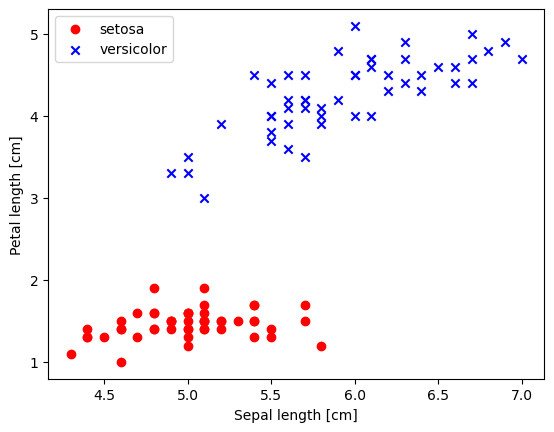

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

한 눈에 봐도 어디에 선을 그으면 결정 경계가 나타날 지 보이죠? 퍼셉트론 같은 선형 분류기가 이 데이터셋을 완벽하게 구분할 수 있을 것 같습니다. 그러면 이 데이터로 퍼셉트론 알고리즘을 훈련한 후, 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 클래스를 구분하는 결정 경계를 찾는지 확인해보겠습니다.

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [11]:
ppn.fit(X, y)

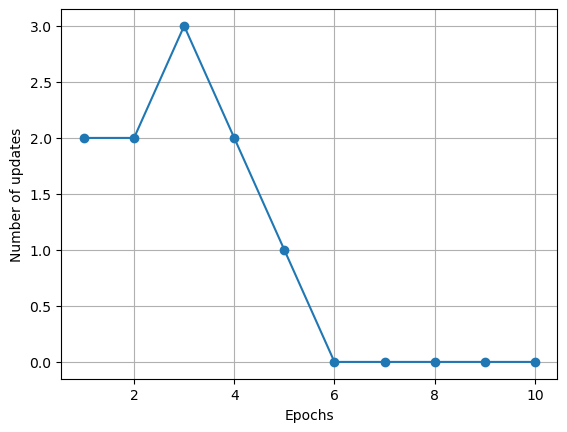

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.grid()
plt.show()

위 그래프에서 볼 수 있듯이, 우리의 퍼셉트론 모델은 여섯 번째 에포크에서 수렴했고 훈련 샘플을 완벽하게 분류했습니다. 간단한 함수를 만들어 2차원 데이터셋의 결정 경계를 시각화해보겠습니다.

In [13]:
from matplotlib.colors import ListedColormap

In [18]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'cyan', 'magenta')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],
                    label=cl)

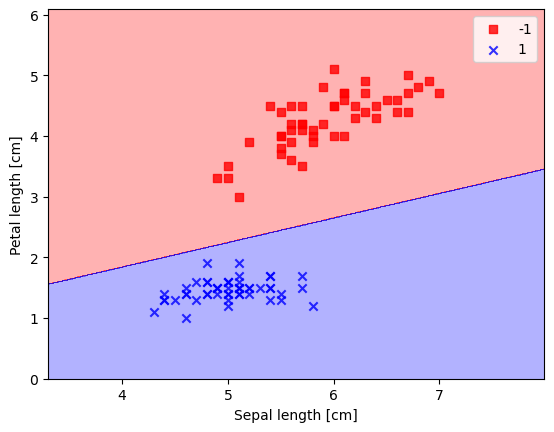

In [19]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc=0)
plt.show()

## 1.3 경사 하강법 - 학습의 수렴
지도학습 알고리즘의 핵심은 학습 과정 동안 최적화할 **목적 함수**(object function)입니다. 보통 최소화하려는 비용 함수 또는 손실 함수가 목적 함수가 되고는 하죠. 앞서 퍼셉트론에서 사용한 단위 계단 함수는 모 아니면 도라는 단점 때문에 계산값이 틀렸을 때 움직이는 방향을 알 수 있지만, 정작 얼마나 움직여야 정답에 가까워지는지까지 알 수는 없습니다. 그래서 초기 머신러닝을 연구한 학자들은 단위 계단 함수 앞에 선형함수 $y=x$를 넣고 제곱 오차합(Sum of Squared Errors, SSE)에 기반한 비용 함수 $J$를 정의한 뒤, 이 비용 함수의 변화량을 바탕으로 학습을 수렴시키고자 했습니다. 이 함수를 시각화하면 마치 골짜기의 아래 방향으로 굴러떨어지는 공을 보는 듯하기 때문에 이 방법에 **경사 하강법**(gradient descent)이라는 이름이 붙었습니다. 아래 그림이 경사 하강법의 아이디어를 간단하게 나타낸 것입니다.  
![그림 2-10](images/Fig2_10.png)  
경사 하강법을 사용하면 비용 함수 $J\left(\boldsymbol{w}\right)$의 그래디언트 $\nabla J\left(\boldsymbol{w}\right)$ 반대 방향으로 조금씩 가중치를 업데이트할 수 있습니다.  
$$\Delta\boldsymbol{w}=-\eta\nabla J\left(\boldsymbol{w}\right)$$  
### 1.3.1 경사 하강법 적용 - 적응형 선형 뉴런
이 경사 하강법을 퍼셉트론에 적용한 모델 중 하나가 **적응형 선형 뉴런**(ADAptive LInear NEuron, ADALINE, 아달린)입니다. 앞서 단위 계단 함수 대신 선형 활성화 함수를 이용했다고 짧게 언급했는데, 바로 이 아달린 모델을 말한 것입니다. 아달린 모델의 워크플로우는 아래와 같습니다. 퍼셉트론과 유사하지만 중간에 선형 활성화 함수가 추가되었습니다.  
![그림 2-9](images/Fig2_9.png)  
이와 같이 수정된 아달린을 클래스로 구현하면 아래와 같습니다.

In [20]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # 다음 단원에 나올 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로 
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

실전에서는 최적의 학습률 $\eta$를 찾기 위해 여러 번 실험을 해야 합니다. 시험 삼아 $\eta=0.01$과 $\eta=0.0001$을 선택해 보죠. 에포크 횟수 대비 비용 함수의 값을 그래프로 나타내면 아달린이 훈련 데이터에서 얼마나 잘 학습하는지를 볼 수 있습니다.

In [21]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

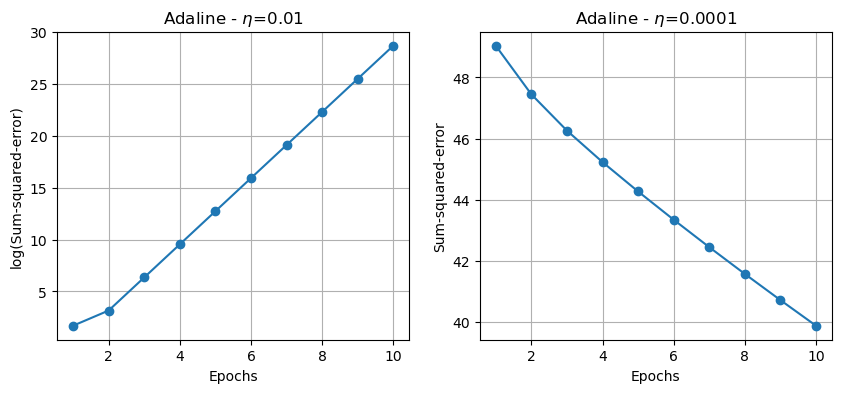

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline - $\eta$=0.01")
ax[0].grid()
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline - $\eta$=0.0001")
ax[1].grid()
plt.show()

왼쪽 그래프는 학습률이 너무 클 때의 문제점을 보여줍니다. 비용 함수를 최소화하지 못하고 오차는 에포크마다 점점 더 커집니다. 심지어, 코드에서 로그 스케일을 적용한 것에서 알 수 있듯이, 기하급수적으로 커집니다. 반대로 오른쪽 그래프와 같이 학습률이 너무 낮을 때는 비용이 감소하기는 하지만 그 변화폭이 너무 작아서 전역 최소값에 수렴하려면 아주 많은 에포크가 필요합니다. 왼쪽 그래프의 케이스를 그림으로 나타내면 아래와 같습니다. 아래 그림 중 왼쪽 그림은 적절하게 학습률을 선택한 경우이고, 오른쪽 그림은 너무 큰 학습률을 선택해서 전역 최소값을 지나친 경우입니다.  
![그림 2-12](https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch02/images/02_12.png?raw=true)  
일반적으로 사용하는 데이터가 매우 커지는 대규모 머신러닝으로 넘어가게 되면 이러한 경사 하강법을 강화시킨 확률적 경사 하강법(stochastic gradient descent)을 사용하기도 하지만, 여기서부터는 라이브러리 내에서 메서드를 호출해서 사용할 때 그 안에 구현되어 있습니다. 자세한 사항은 ch01Bonus_perceptron.md에서 참고하시면 되겠고, 우리가 직접 코딩으로 퍼셉트론과 그 파생 모델을 바닥에서부터 구현하는 것은 여기서 마무리하겠습니다. 사실은 이렇게 고생하지 않아도 이미 메서드를 구현해놓은 패키지가 있었기 때문에...

### 1.4 사이킷런으로 퍼셉트론 실습하기
사이킷런에는 퍼셉트론을 포함해 다양한 학습 알고리즘이 제공되어 있고, 데이터 전처리나 세부 조정, 모델 평가를 위해 편리하게 사용할 수 있는 함수가 많습니다. 아까 url 주소로 불러왔던 그 붓꽃 데이터를 불러오는 기능도 아예 메서드로 구현되어 있습니다. 전처리 관련은 5단원에서 다루도록 하고, 일단 이번 단원에서는 사이킷런에서 제공하는 퍼셉트론 메서드를 써보도록 하겠습니다.

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
X = iris.data[:, [2, 3]]

In [30]:
y = iris.target

In [31]:
print("클래스 레이블:", np.unique(y))

클래스 레이블: [0 1 2]


처음 본 데이터에서 훈련된 모델 성능을 평가하기 위해 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 분할합니다. 이것도 자세한 내용은 5단원에서 다루겠습니다.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

위 코드에서 `test_size` 인수는 전체 데이터셋 중 어느 정도의 비중을 테스트 데이터셋으로 할당할 지 지정합니다. 이 예제의 경우 0.3, 즉 30%만큼을 테스트 데이터로 배정합니다. 데이터셋을 분할하기 전 무작위로 섞기 위해 사용되는 `random_state` 매개변수에 고정된 랜덤 시드 1을 전달합니다. 이러면 언제 누가 실행하더라도 같은 종류의 데이터가 훈련 데이터셋과 테스트 데이터셋에 전달됩니다.  
마지막으로 `stratify=y`를 통해 계층화(stratification) 기능을 사용합니다. 계층화란, 함수가 훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만든다는 의미입니다. 넘파이의 `bincount` 함수를 사용해 그 계층화가 잘 되었는지 확인할 수 있습니다.

In [34]:
print("y의 레이블 카운트:", np.bincount(y))

y의 레이블 카운트: [50 50 50]


In [35]:
print("y_train의 레이블 카운트:", np.bincount(y_train))

y_train의 레이블 카운트: [35 35 35]


In [36]:
print("y_test의 레이블 카운트:", np.bincount(y_test))

y_test의 레이블 카운트: [15 15 15]


앞서 설명한 경사 하강법 알고리즘은 퍼셉트론을 포함해 많은 알고리즘의 최상의 성능을 위해 특성 스케일을 조정해줘야 합니다. 나중에 설명하겠지만 사이킷런의 `preprocessing` 모듈의 `StandardScaler` 클래스를 사용해 특성이 표준정규분포를 따르도록 표준화를 하겠습니다.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
sc.fit(X_train) # 스케일러 훈련에는 훈련 데이터셋만 사용합니다!

StandardScaler()

In [40]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

그럼 본격적으로 퍼셉트론을 불러오도록 하겠습니다. 사이킷런의 퍼셉트론 클래스는 `linear_model`이라는 서브패키지에 존재합니다. 사이킷런의 알고리즘은 대부분 기본적으로 다중 분류를 지원합니다. 여기서도 세 개의 붓꽃 클래스를 퍼셉트론에 주입해보겠습니다.

In [41]:
from sklearn.linear_model import Perceptron

In [42]:
ppn = Perceptron(eta0=0.1, random_state=1) # 인수 이름이 eta0인 것에 주의!

In [43]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [44]:
y_pred = ppn.predict(X_test_std)
print(f"잘못 분류된 샘플 개수: {(y_test != y_pred).sum():d}")

잘못 분류된 샘플 개수: 1


코드를 실행하면 45개의 테스트 샘플 중 한 개를 잘못 분류했습니다. 이를 사이킷런의 `metrics` 모듈의 성능 지표 중 하나를 이용해 계산합니다.

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print(f"정확도: {accuracy_score(y_test, y_pred):.3f}")

정확도: 0.978


참고로 사이킷런의 분류기(classfier) 계열 클래스들은 분류기의 예측 정확도를 자체적으로 계산하는 `score` 메서드를 공통적으로 내장하고 있습니다. 따라서 이 방식으로도 정확도를 계산할 수 있습니다.

In [47]:
print(f"정확도: {ppn.score(X_test_std, y_test):.3f}")

정확도: 0.978


마지막으로 `plot_decision_regions` 함수를 사용해 새로운 퍼셉트론 모델의 결정 경계를 그려서 세 개의 붓꽃 샘플을 잘 구분하는지 시각화하겠습니다. 여기서는 조금 수정해서 테스트 데이터셋의 샘플을 작은 원으로 다르게 표시하겠습니다.

In [48]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0, linewidth=1,
                    marker='o', s=100, 
                    label='test set')

In [49]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

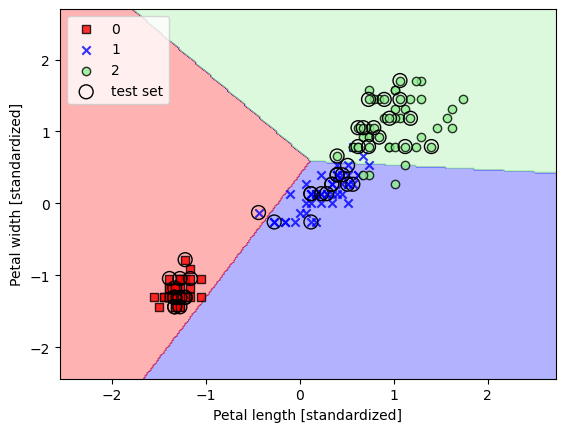

In [51]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc='upper left')
plt.show()

위 결과 그래프에서도 볼 수 있듯이, 세 개의 붓꽃 클래스는 선형 결정 경계로 완벽하게 분류되지 못합니다. 정확도 부분에서도 본 것처럼 한 가지 테스트 케이스가 오분류되어 있고, 심지어 훈련 데이터셋 중에서도 오분류된 것들이 있습니다. 이를 정확하게 예측하기 위해 새로운 모델의 도입이 고려되었고, 이 모델들이 다음 단원에서 집중적으로 다루게 될 주제입니다.